# Fairface image dataset - Exploratory data analysis

Dataset link: https://github.com/joojs/fairface

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

## Data overview

In [6]:
# Load the dataset
file_path = 'fairface_label_merge.csv'
data_df = pd.read_csv(file_path)

data_df.shape

(97698, 5)

In [ ]:
data_df.head()

,file,age,gender,race,service_test
0,val/1.jpg,9-Mar,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False


## Data cleaning

In [ ]:
null_sum = data_df.isnull().sum()
null_sum

file            0
age             0
gender          0
race            0
service_test    0
dtype: int64

In [ ]:
data_df.dtypes

file            object
age             object
gender          object
race            object
service_test      bool
dtype: object

### process categorical data

In [ ]:
# Convert the following columns to categorical data types
cat_col = ['gender', 'race', 'service_test', 'age']
data_df[cat_col] = data_df[cat_col].astype('category')
data_df[cat_col]

,gender,race,service_test,age
0,Male,East Asian,False,9-Mar
1,Female,East Asian,True,50-59
2,Male,White,True,30-39
3,Female,Latino_Hispanic,True,20-29
4,Male,Southeast Asian,False,20-29
...,...,...,...,...
97693,Male,Indian,True,20-29
97694,Male,Indian,True,19-Oct
97695,Female,Indian,True,more than 70
97696,Female,Black,True,19-Oct


In [ ]:
data_df['age'].value_counts()

20-29           28898
30-39           21580
40-49           12097
9-Mar           11764
19-Oct          10284
50-59            7024
60-69            3100
0-2              1991
more than 70      960
Name: age, dtype: int64

In [ ]:
# Drop the row with NaN
data_df = data_df.dropna()

# Drop the age column considering we don't need to label age
data_df = data_df.drop('age', axis=1)

In [ ]:
data_df.head()

,file,gender,race,service_test
0,val/1.jpg,Male,East Asian,False
1,val/2.jpg,Female,East Asian,True
2,val/3.jpg,Male,White,True
3,val/4.jpg,Female,Latino_Hispanic,True
4,val/5.jpg,Male,Southeast Asian,False


## Data transformation

### image preprocessing and normalization - self-learned from Google

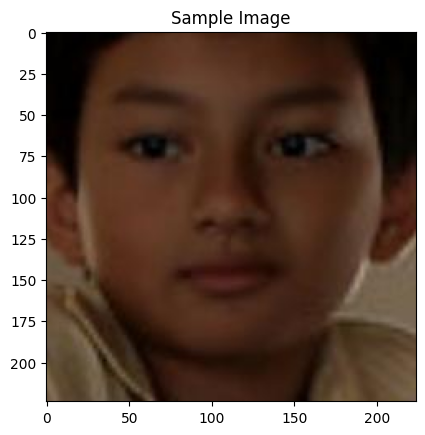

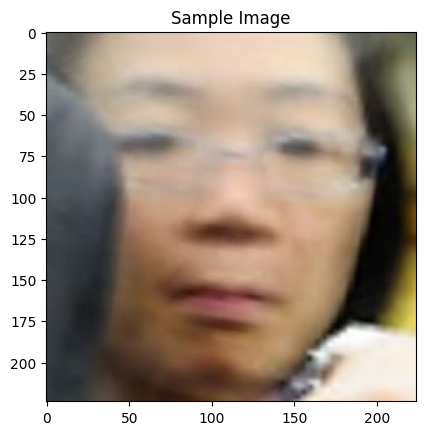

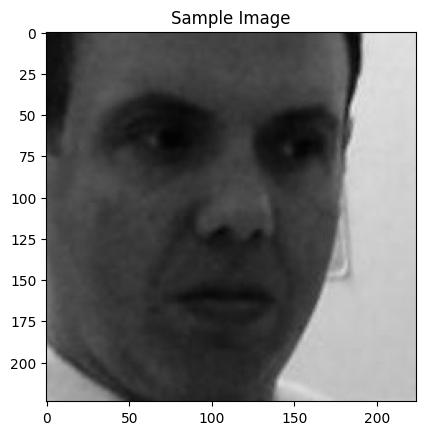

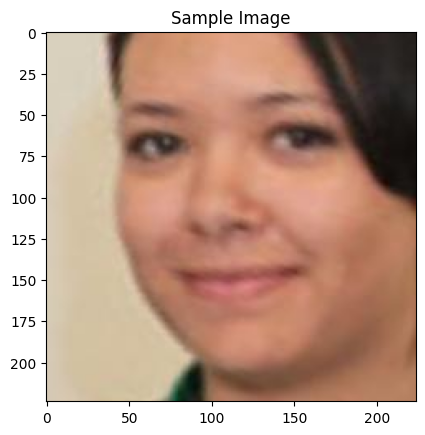

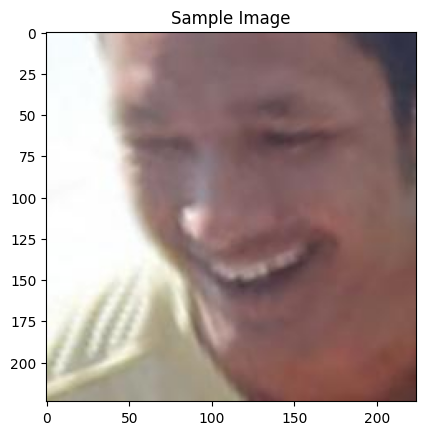

In [7]:
image_paths = data_df['file'].head()

root_path = r"/content/drive/MyDrive/UChi/MACS-30100/proj/fairface-img-margin025-trainval/"

for image_path in image_paths:
    real_path = root_path + image_path
    if os.path.exists(real_path):
        img = Image.open(real_path)
        plt.imshow(img)
        plt.title('Sample Image')
        plt.show()
    else:
        print(f"Image not found at path: {real_path}")

In [12]:
image_paths = data_df['file']

root_path = r"/content/drive/MyDrive/UChi/MACS-30100/proj/fairface-img-margin025-trainval/"

# Lists to store the image vectors and the corresponding image paths
image_vectors = []
image_paths_processed = []

for image_path in image_paths:
    real_path = root_path + image_path
    if os.path.exists(real_path):
        # Load the image
        img = Image.open(real_path)
        # Preprocess the image
        # Resize the image to a 64x64 pixels
        img = img.resize((64, 64))

        # Convert the image to grayscale
        img = img.convert('L')

        # Convert the image to a numpy array
        img_array = np.array(img)

        # Normalize the pixel values (0-1 range)
        img_array_normalized = img_array / 255.0

        # Flatten the array to a vector
        img_vector = img_array_normalized.flatten()

        # Append the flattened image vector to the list
        image_vectors.append(img_vector)

        # Also append the image path for reference
        image_paths_processed.append(image_path)
    else:
        print(f"Image not found at path: {real_path}")

# Once all images are processed, create a DataFrame
# Each row in the DataFrame corresponds to the flattened image array of an image
images_df = pd.DataFrame(image_vectors)

# Add the image paths as a column in the DataFrame for reference
images_df['image_path'] = image_paths_processed

# Now you have a DataFrame where each row is an image and the last column is the image path
images_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,image_path
0,0.003922,0.007843,0.011765,0.003922,0.007843,0.003922,0.003922,0.007843,0.015686,0.007843,...,0.266667,0.258824,0.301961,0.329412,0.333333,0.349020,0.376471,0.392157,0.396078,val/1.jpg
1,0.415686,0.388235,0.372549,0.364706,0.360784,0.384314,0.423529,0.470588,0.525490,0.584314,...,0.866667,0.850980,0.847059,0.847059,0.862745,0.874510,0.890196,0.905882,0.917647,val/2.jpg
2,0.062745,0.066667,0.066667,0.090196,0.133333,0.192157,0.227451,0.278431,0.317647,0.317647,...,0.764706,0.764706,0.764706,0.760784,0.764706,0.768627,0.760784,0.756863,0.764706,val/3.jpg
3,0.811765,0.811765,0.815686,0.819608,0.819608,0.819608,0.819608,0.815686,0.819608,0.796078,...,0.556863,0.552941,0.556863,0.556863,0.560784,0.556863,0.552941,0.552941,0.545098,val/4.jpg
4,0.992157,0.992157,0.992157,0.992157,0.988235,0.988235,0.976471,0.980392,0.901961,0.749020,...,0.329412,0.313725,0.298039,0.282353,0.270588,0.266667,0.262745,0.262745,0.254902,val/5.jpg


In [14]:
images_df.to_csv('image_df.csv', index=False)

## Feature engineering

### encode categorical data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe_race = OneHotEncoder(handle_unknown='ignore')
ohe_race.fit(data_df[['race']])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
# the categories learned during the fit process
ohe_race.categories_

[array(['Black', 'East Asian', 'Indian', 'Latino_Hispanic',
        'Middle Eastern', 'Southeast Asian', 'White'], dtype=object)]

In [ ]:
# encode the "race" with the learned categories during the fit process
ohe_race.transform(data_df[['race']]).toarray()[0]

array([0., 1., 0., 0., 0., 0., 0.])

In [ ]:
# convert the original "race" column to the encoded categories
pd.DataFrame(ohe_race.transform(data_df[['race']]).toarray()).rename(columns={i: catg for i, catg in enumerate(ohe_race.categories_[0])})

,Black,East Asian,Indian,Latino_Hispanic,Middle Eastern,Southeast Asian,White
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
97693,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97694,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97695,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97696,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# similar process for "gender"
ohe_gender = OneHotEncoder(handle_unknown='ignore')
ohe_gender.fit(data_df[['gender']])
ohe_gender.transform(data_df[['gender']]).toarray()[0]

# convert the original "gender" column to the encoded categories
pd.DataFrame(ohe_gender.transform(data_df[['gender']]).toarray()).rename(columns={i: catg for i, catg in enumerate(ohe_gender.categories_[0])})


,Female,Male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
97693,0.0,1.0
97694,0.0,1.0
97695,1.0,0.0
97696,1.0,0.0


## Additional analysis

### visualization

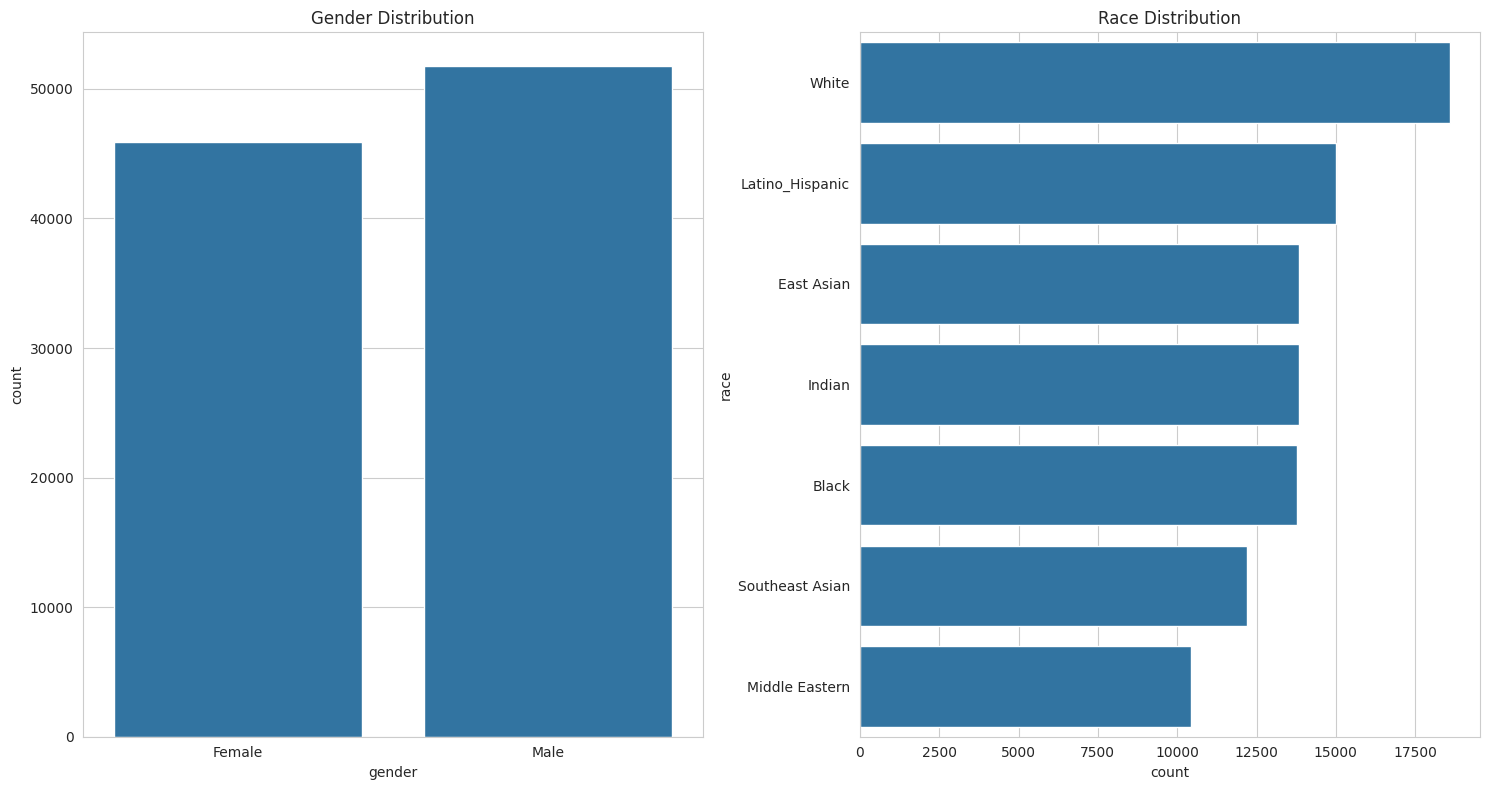

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))

# Subplot for the gender distribution
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=data_df)
plt.title('Gender Distribution')

# Subplot for the race distribution
plt.subplot(1, 2, 2)
race_order = data_df['race'].value_counts().index
sns.countplot(y='race', data=data_df, order=race_order)
plt.title('Race Distribution')

# Show the plots
plt.tight_layout()
plt.show()

In the visualization we can see that both gender and race attribute are relatively fairly distributed, which can decrease the potential bias from machine learning process.